### Python 交易数据爬虫实战 ( 机构持仓分析 ）
## <center>期货持仓分析：纸浆（Pulp）期货合约交易数据爬取 + 分析</center>
### <center>算法验证：张君颖  ； 报告日期：2021.3.19</center>
  <font color=blue><center>作者邮箱：zhang.jun.ying@outlook.com</center></font>   
  
  <font color=blue><center>项目源代码、数据、自定义函数已上传GitHub：</center></font>   
    
<font color=blue><center>https://github.com/lotbear/Python-Financial-investment-strategy</center></font>

### >>> 以当下时间为基准，查看未来3个月纸浆期货合约的持仓交易情况

数据来源：新浪财经 > 期货 > 纸浆期货合约   

http://vip.stock.finance.sina.com.cn/q/view/vFutures_Positions_cjcc.php?t_breed=SP2104&t_date=2021-03-17

In [1]:
import pandas as pd
import datetime
from datetime import timedelta

Today=datetime.date.today()

# 获取前一日交易数据
# 若当前时间为 周六、周日、周一，前一交易日为 周五
if Today.isoweekday()== 7:
    Yesterday=str(datetime.date.today()+timedelta(days=-2))
elif Today.isoweekday()== 1:
    Yesterday=str(datetime.date.today()+timedelta(days=-3))
else:
    Yesterday=str(datetime.date.today()+timedelta(days=-1))
print('机构交易 & 持仓数据时间:',Yesterday)

机构交易 & 持仓数据时间: 2021-03-18


In [2]:
SP_str=Yesterday[2:4]+Yesterday[5:7]
SP_str_1=str(int(SP_str)+1)
SP_str_2=str(int(SP_str)+2)
SP_str_3=str(int(SP_str)+3)
print('查看以下3个期货合约：','SP'+SP_str_1,',SP'+SP_str_2,',SP'+SP_str_3)

查看以下3个期货合约： SP2104 ,SP2105 ,SP2106


### >>> SP2104 机构当日 总成交量 分析

In [3]:
url_1="http://vip.stock.finance.sina.com.cn/q/view/vFutures_Positions_cjcc.php?t_breed=SP"+str(SP_str_1)+"&t_date="+str(Yesterday)
content_1=pd.read_html(url_1)
print('纸浆期货合约','SP'+SP_str_1,',',Yesterday+' 持仓数据：')
print('='*50)
print('【机构总成交量排名 前10】')
content_1[2][:10]

纸浆期货合约 SP2104 , 2021-03-18 持仓数据：
【机构总成交量排名 前10】


,名次,会员简称,成交量,比上交易增减
0,1,中信期货,1806,575.0
1,2,一德期货,1692,1189.0
2,3,华安期货,1407,1387.0
3,4,国富期货,600,250.0
4,5,东证期货,596,450.0
5,6,徽商期货,590,490.0
6,7,方正中期,573,388.0
7,8,创元期货,420,215.0
8,9,光大期货,379,-22.0
9,10,中粮期货,350,350.0


In [4]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

Pie().add('SP'+SP_str_1+"当日总成交量",
        [list(z) for z in zip(content_1[2]['会员简称'][:20].tolist(), content_1[2]['成交量'][:20].tolist())],
        radius=["40%", "55%"],
        label_opts=opts.LabelOpts(
            position="outside",
            formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
            background_color="#eee",
            border_color="#aaa",
            border_width=1,
            border_radius=4,
            rich={
                "a": {"color": "#999", "lineHeight": 22, "align": "center"},
                "abg": {
                    "backgroundColor": "#e3e3e3",
                    "width": "100%",
                    "align": "right",
                    "height": 22,
                    "borderRadius": [4, 4, 0, 0],
                },
                "hr": {
                    "borderColor": "#aaa",
                    "width": "100%",
                    "borderWidth": 0.5,
                    "height": 0,
                },
                "b": {"fontSize": 16, "lineHeight": 33},
                "per": {
                    "color": "#eee",
                    "backgroundColor": "#334455",
                    "padding": [2, 4],
                    "borderRadius": 2,
                },
            },
        ),
    ).set_global_opts(title_opts=opts.TitleOpts\
                      (title="纸浆期货合约"+"\n\n"+'SP'+SP_str_1+"\n\n"+Yesterday+"\n\n机构总成交量"),\
                     legend_opts=opts.LegendOpts(type_='scroll',orient='vertical',pos_right=20))# .render_notebook()

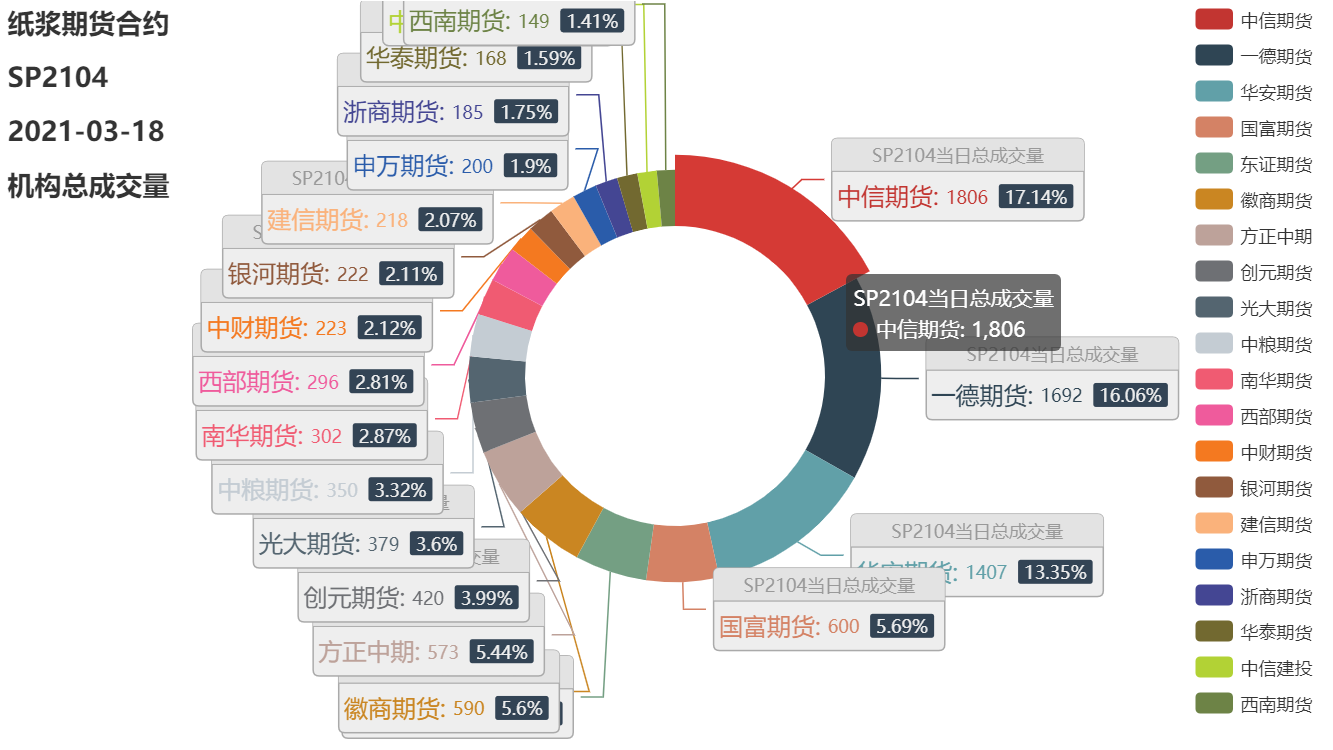

### >>> SP2104 机构当日 “ 多单持仓 ” 增减热力图

In [5]:
print('纸浆期货合约','SP'+SP_str_1,',',Yesterday+' 持仓数据：')
print('='*50)
print('【机构多单持仓排名 前10】')
content_1[3][:10]

纸浆期货合约 SP2104 , 2021-03-18 持仓数据：
【机构多单持仓排名 前10】


,名次,会员简称,多单持仓,比上交易增减
0,1,中信期货,2993,-360.0
1,2,国泰君安,2140,-3.0
2,3,大地期货,1778,0.0
3,4,一德期货,1379,-1599.0
4,5,永安期货,1167,-7.0
5,6,方正中期,1034,-135.0
6,7,国富期货,870,-600.0
7,8,中信建投,612,-160.0
8,9,弘业期货,400,100.0
9,10,鲁证期货,215,85.0


In [6]:
from pyecharts.charts import HeatMap

Name = content_1[3]['会员简称'][:20].tolist()
Name_No = content_1[3]['名次'][:20].tolist()
Name_No = list(map(int, Name_No))
Volume = content_1[3]['多单持仓'][:20].tolist()
Delta = content_1[3]['比上交易增减'][:20].tolist()
Delta = list(map(int,Delta))
X_No=list(range(20))
data_T =[list(z) for z in zip(X_No,Name,Delta)]

HeatMap().add_xaxis(xaxis_data=Volume).add_yaxis(
        '横轴为机构 "现有仓位"\n\n色块为单日 "仓位增减"',
        yaxis_data=Name,
        value=data_T,
        label_opts=opts.LabelOpts(is_show=True, position="inside"),
    ).set_global_opts(
        title_opts=opts.TitleOpts(title='SP'+SP_str_1+' , '+Yesterday+", 多单持仓热力图"),
        xaxis_opts=opts.AxisOpts(type_="category",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1))),
        yaxis_opts=opts.AxisOpts(type_="category",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1))),
        visualmap_opts=opts.VisualMapOpts(
            min_=min(Delta), max_=max(Delta), is_calculable=True, orient="horizontal", pos_left="center",\
            range_color=["#1E90FF","#FFFF00","#FF4500"]
        ))# .render_notebook()

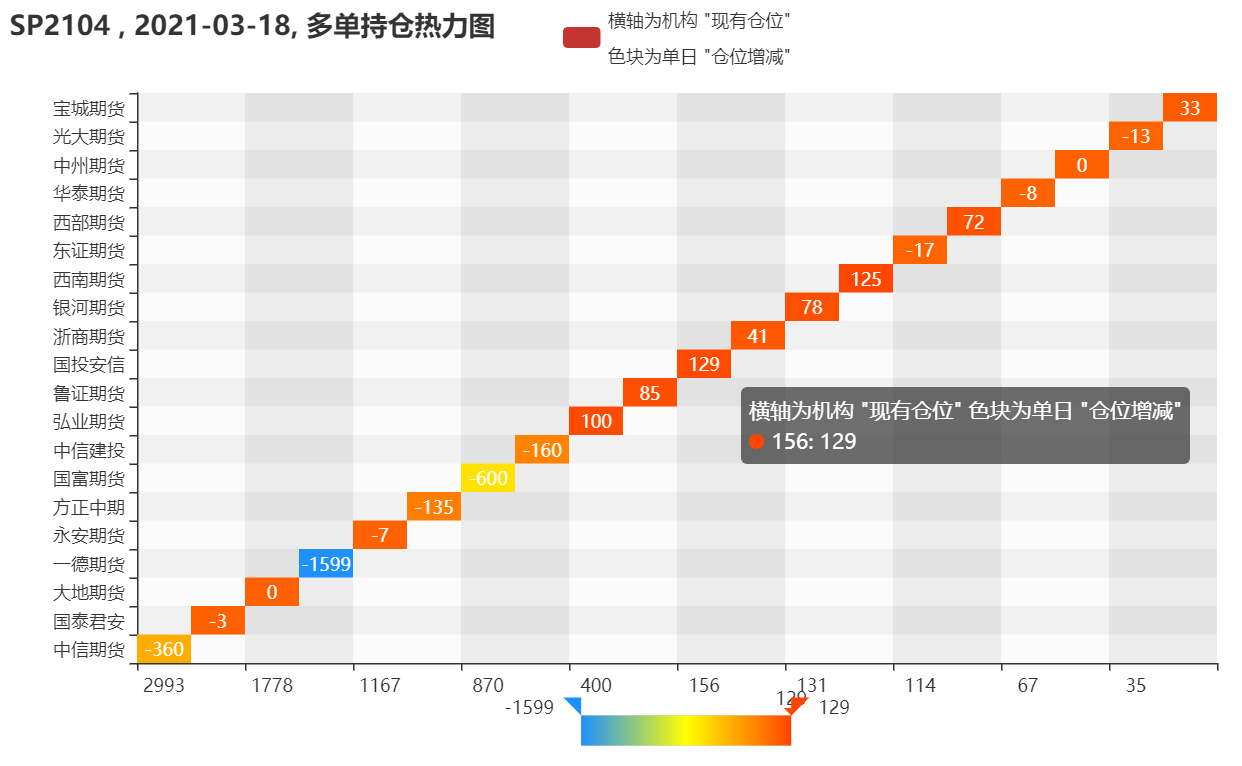

### >>> SP2104 机构当日 “ 空单持仓 ” 增减热力图

In [7]:
print('纸浆期货合约','SP'+SP_str_1,',',Yesterday+' 持仓数据：')
print('='*50)
print('【机构空单持仓排名 前10】')
content_1[4][:10]

纸浆期货合约 SP2104 , 2021-03-18 持仓数据：
【机构空单持仓排名 前10】


,名次,会员简称,空单持仓,比上交易增减
0,1,中财期货,2636,-223.0
1,2,浙商期货,2494,-144.0
2,3,南华期货,1118,-301.0
3,4,建信期货,713,-188.0
4,5,中信期货,581,-414.0
5,6,冠通期货,529,-30.0
6,7,永安期货,474,-51.0
7,8,申万期货,457,-200.0
8,9,兴证期货,444,-79.0
9,10,宏源期货,437,0.0


In [8]:
from pyecharts.charts import HeatMap

Name = content_1[4]['会员简称'][:20].tolist()
Name_No = content_1[4]['名次'][:20].tolist()
Name_No = list(map(int, Name_No))
Volume = content_1[4]['空单持仓'][:20].tolist()
Delta = content_1[4]['比上交易增减'][:20].tolist()
Delta = list(map(int,Delta))
X_No=list(range(20))
data_T =[list(z) for z in zip(X_No,Name,Delta)]

HeatMap().add_xaxis(xaxis_data=Volume).add_yaxis(
        '横轴为机构 "现有仓位"\n\n色块为单日 "仓位增减"',
        yaxis_data=Name,
        value=data_T,
        label_opts=opts.LabelOpts(is_show=True, position="inside"),
    ).set_global_opts(
        title_opts=opts.TitleOpts(title='SP'+SP_str_1+' , '+Yesterday+", 空单持仓热力图"),
        xaxis_opts=opts.AxisOpts(type_="category",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1))),
        yaxis_opts=opts.AxisOpts(type_="category",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1))),
        visualmap_opts=opts.VisualMapOpts(
            min_=min(Delta), max_=max(Delta), is_calculable=True, orient="horizontal", pos_left="center",\
            range_color=["#1E90FF","#FFFF00","#FF4500"]
        ))# .render_notebook()

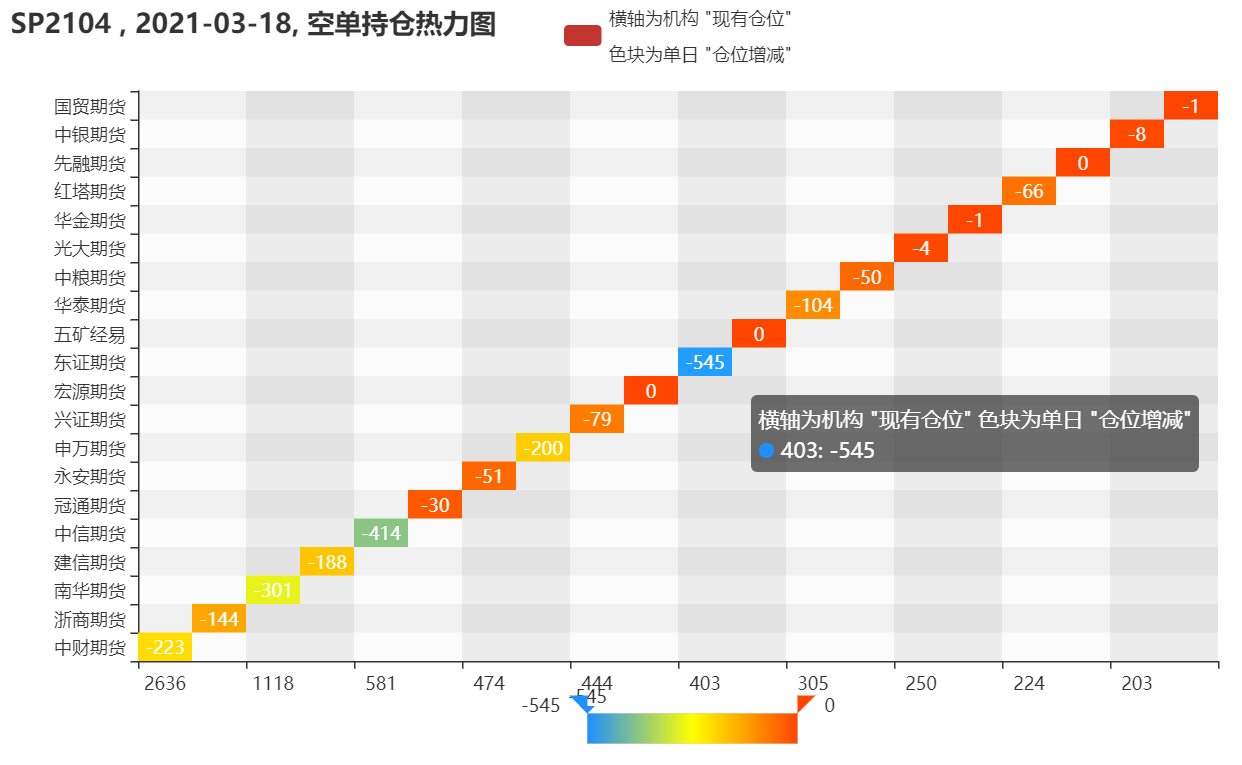

### >>> SP2105 机构当日 总成交量 分析

In [9]:
# print('纸浆期货合约','SP'+SP_str_2,',',Yesterday+' 持仓数据：')
url_2="http://vip.stock.finance.sina.com.cn/q/view/vFutures_Positions_cjcc.php?t_breed=SP"+str(SP_str_2)+"&t_date="+str(Yesterday)
content_2=pd.read_html(url_2)
# print('='*50)
# print('【机构总成交量排名：】')
# print(content_2[2])
# print('='*50)
# print('【机构多单持仓排名：】')
# print(content_2[3])
# print('='*50)
# print('【机构空单持仓排名：】')
# print(content_2[4])

In [10]:
Pie().add('SP'+SP_str_2+"当日总成交量",
        [list(z) for z in zip(content_2[2]['会员简称'][:20].tolist(), content_2[2]['成交量'][:20].tolist())],
        radius=["40%", "55%"],
        label_opts=opts.LabelOpts(
            position="outside",
            formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
            background_color="#eee",
            border_color="#aaa",
            border_width=1,
            border_radius=4,
            rich={
                "a": {"color": "#999", "lineHeight": 22, "align": "center"},
                "abg": {
                    "backgroundColor": "#e3e3e3",
                    "width": "100%",
                    "align": "right",
                    "height": 22,
                    "borderRadius": [4, 4, 0, 0],
                },
                "hr": {
                    "borderColor": "#aaa",
                    "width": "100%",
                    "borderWidth": 0.5,
                    "height": 0,
                },
                "b": {"fontSize": 16, "lineHeight": 33},
                "per": {
                    "color": "#eee",
                    "backgroundColor": "#334455",
                    "padding": [2, 4],
                    "borderRadius": 2,
                },
            },
        ),
    ).set_global_opts(title_opts=opts.TitleOpts\
                      (title="纸浆期货合约"+"\n\n"+'SP'+SP_str_2+"\n\n"+Yesterday+"\n\n机构总成交量"),\
                     legend_opts=opts.LegendOpts(type_='scroll',orient='vertical',pos_right=20))# .render_notebook()

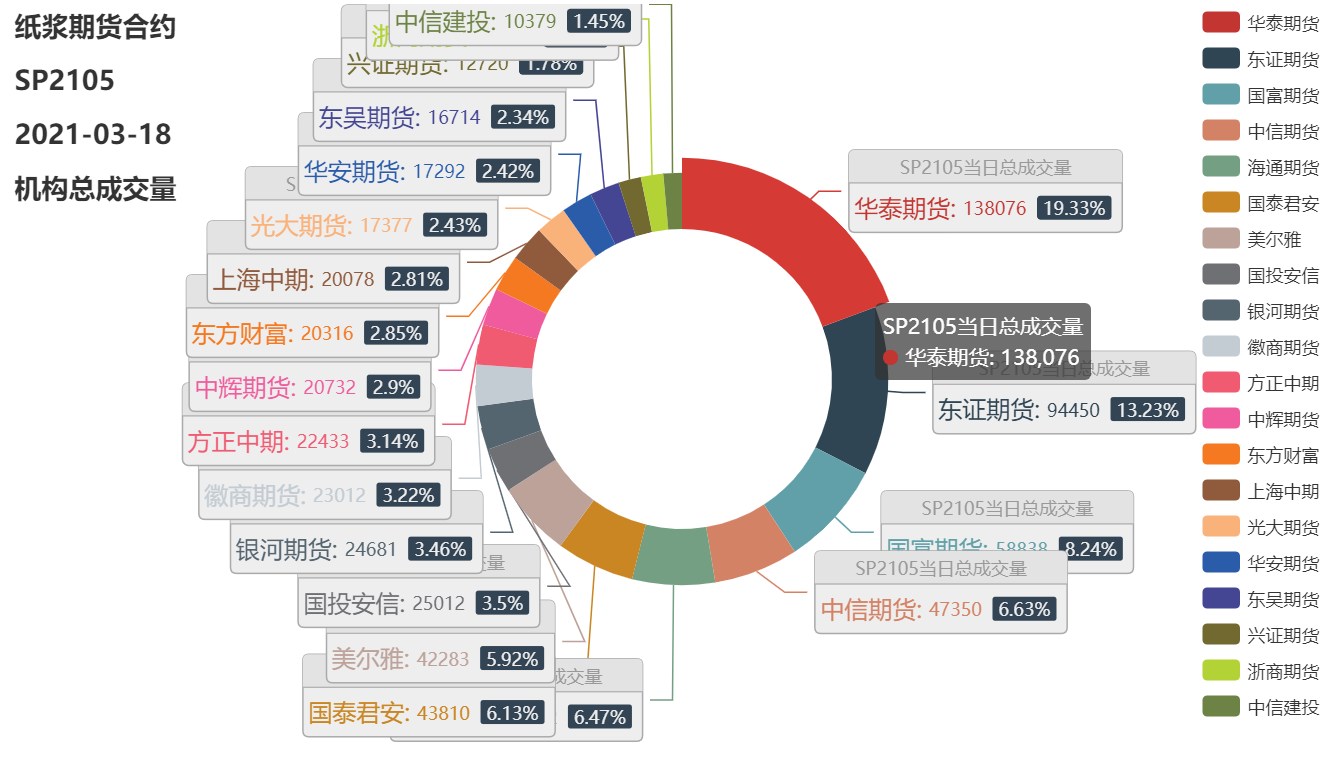

### >>> SP2105 机构当日 “ 多单持仓 ” 增减热力图

In [11]:
from pyecharts.charts import HeatMap

Name = content_2[3]['会员简称'][:20].tolist()
Name_No = content_2[3]['名次'][:20].tolist()
Name_No = list(map(int, Name_No))
Volume = content_2[3]['多单持仓'][:20].tolist()
Delta = content_2[3]['比上交易增减'][:20].tolist()
Delta = list(map(int,Delta))
X_No=list(range(20))
data_T =[list(z) for z in zip(X_No,Name,Delta)]

HeatMap().add_xaxis(xaxis_data=Volume).add_yaxis(
        '横轴为机构 "现有仓位"\n\n色块为单日 "仓位增减"',
        yaxis_data=Name,
        value=data_T,
        label_opts=opts.LabelOpts(is_show=True, position="inside"),
    ).set_global_opts(
        title_opts=opts.TitleOpts(title='SP'+SP_str_2+' , '+Yesterday+", 多单持仓热力图"),
        xaxis_opts=opts.AxisOpts(type_="category",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1))),
        yaxis_opts=opts.AxisOpts(type_="category",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1))),
        visualmap_opts=opts.VisualMapOpts(
            min_=min(Delta), max_=max(Delta), is_calculable=True, orient="horizontal", pos_left="center",\
            range_color=["#1E90FF","#FFFF00","#FF4500"]
        )) # .render_notebook()

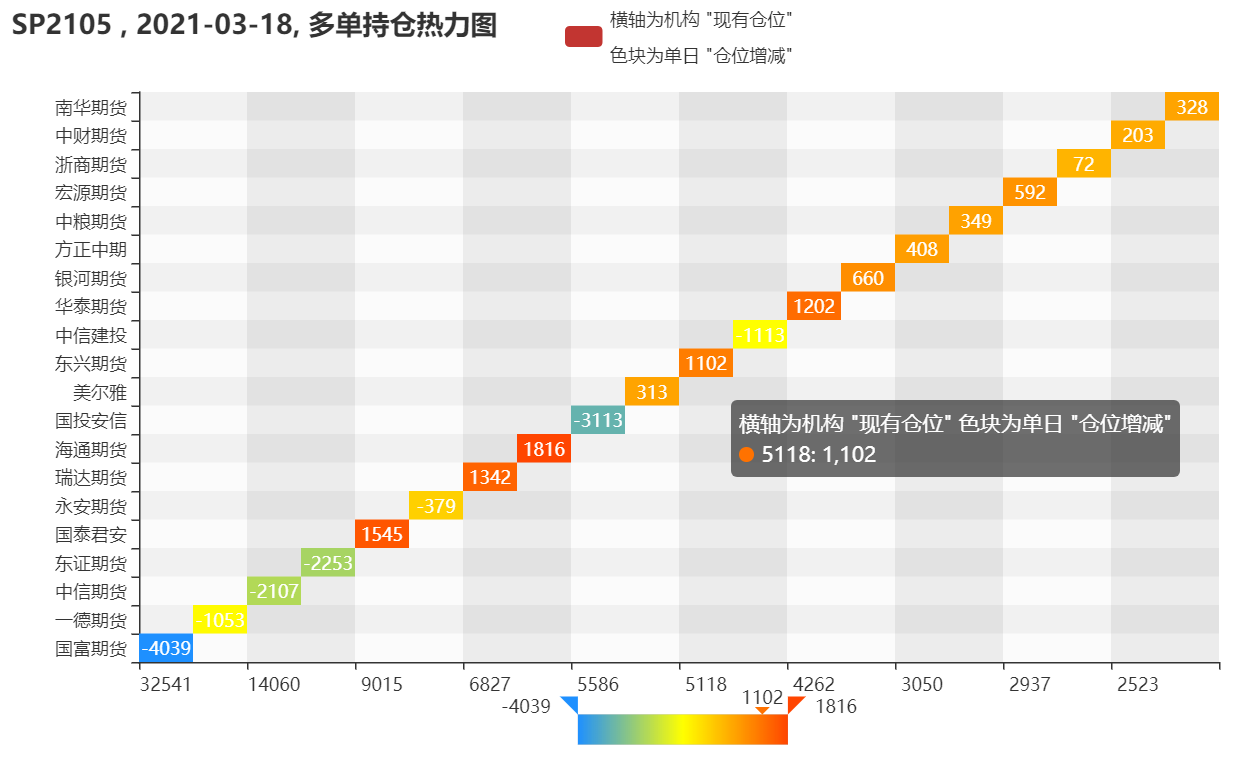

### >>> SP2105 机构当日 “ 空单持仓 ” 增减热力图

In [12]:
from pyecharts.charts import HeatMap

Name = content_2[4]['会员简称'][:20].tolist()
Name_No = content_2[4]['名次'][:20].tolist()
Name_No = list(map(int, Name_No))
Volume = content_2[4]['空单持仓'][:20].tolist()
Delta = content_2[4]['比上交易增减'][:20].tolist()
Delta = list(map(int,Delta))
X_No=list(range(20))
data_T =[list(z) for z in zip(X_No,Name,Delta)]

HeatMap().add_xaxis(xaxis_data=Volume).add_yaxis(
        '横轴为机构 "现有仓位"\n\n色块为单日 "仓位增减"',
        yaxis_data=Name,
        value=data_T,
        label_opts=opts.LabelOpts(is_show=True, position="inside"),
    ).set_global_opts(
        title_opts=opts.TitleOpts(title='SP'+SP_str_2+' , '+Yesterday+", 空单持仓热力图"),
        xaxis_opts=opts.AxisOpts(type_="category",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1))),
        yaxis_opts=opts.AxisOpts(type_="category",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1))),
        visualmap_opts=opts.VisualMapOpts(
            min_=min(Delta), max_=max(Delta), is_calculable=True, orient="horizontal", pos_left="center",\
            range_color=["#1E90FF","#FFFF00","#FF4500"]
        ))# .render_notebook()

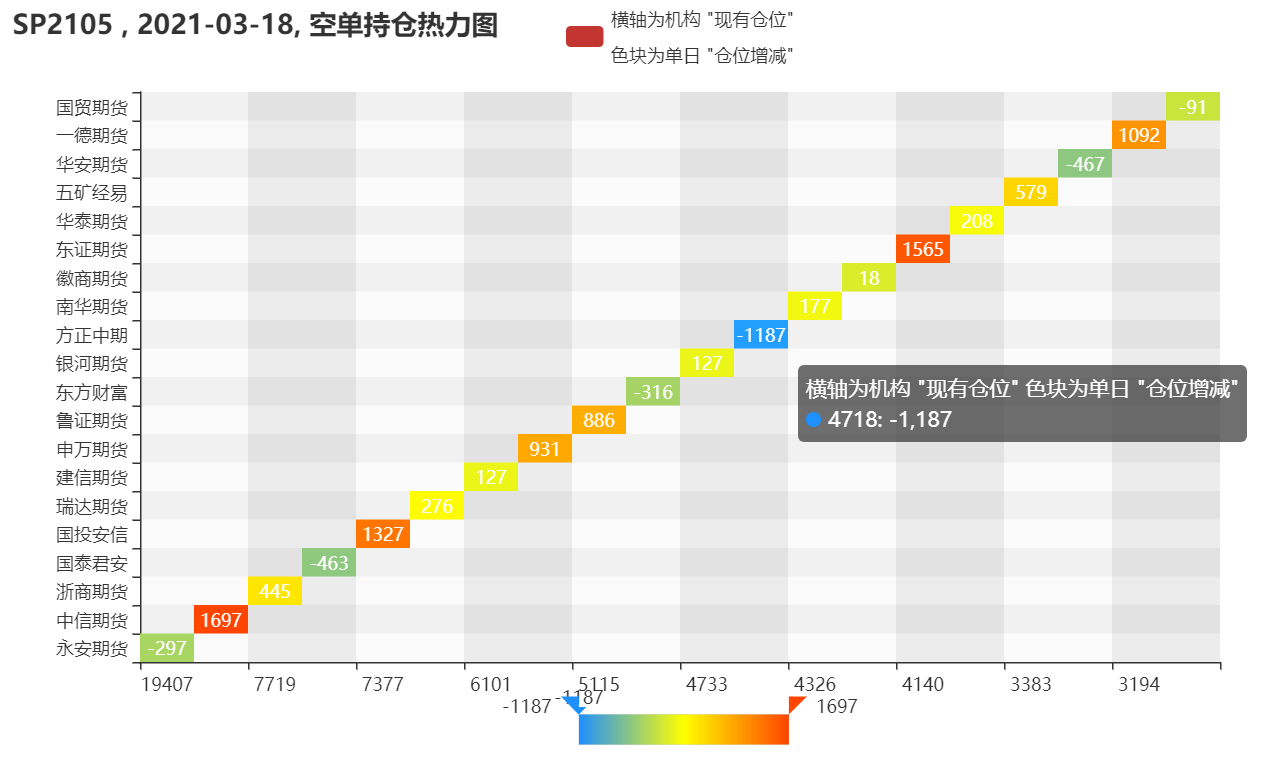

### >>> SP2106 机构当日 总成交量 分析

In [13]:
# print('纸浆期货合约','SP'+SP_str_3,',',Yesterday+' 持仓数据：')
url_3="http://vip.stock.finance.sina.com.cn/q/view/vFutures_Positions_cjcc.php?t_breed=SP"+str(SP_str_3)+"&t_date="+str(Yesterday)
content_3=pd.read_html(url_3)
# print('='*50)
# print('【机构总成交量排名：】')
# print(content_3[2])
# print('='*50)
# print('【机构多单持仓排名：】')
# print(content_3[3])
# print('='*50)
# print('【机构空单持仓排名：】')
# print(content_3[4])

In [14]:
Pie().add('SP'+SP_str_3+"当日总成交量",
        [list(z) for z in zip(content_3[2]['会员简称'][:20].tolist(), content_3[2]['成交量'][:20].tolist())],
        radius=["40%", "55%"],
        label_opts=opts.LabelOpts(
            position="outside",
            formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
            background_color="#eee",
            border_color="#aaa",
            border_width=1,
            border_radius=4,
            rich={
                "a": {"color": "#999", "lineHeight": 22, "align": "center"},
                "abg": {
                    "backgroundColor": "#e3e3e3",
                    "width": "100%",
                    "align": "right",
                    "height": 22,
                    "borderRadius": [4, 4, 0, 0],
                },
                "hr": {
                    "borderColor": "#aaa",
                    "width": "100%",
                    "borderWidth": 0.5,
                    "height": 0,
                },
                "b": {"fontSize": 16, "lineHeight": 33},
                "per": {
                    "color": "#eee",
                    "backgroundColor": "#334455",
                    "padding": [2, 4],
                    "borderRadius": 2,
                },
            },
        ),
    ).set_global_opts(title_opts=opts.TitleOpts\
                      (title="纸浆期货合约"+"\n\n"+'SP'+SP_str_3+"\n\n"+Yesterday+"\n\n机构总成交量"),\
                     legend_opts=opts.LegendOpts(type_='scroll',orient='vertical',pos_right=20))# .render_notebook()

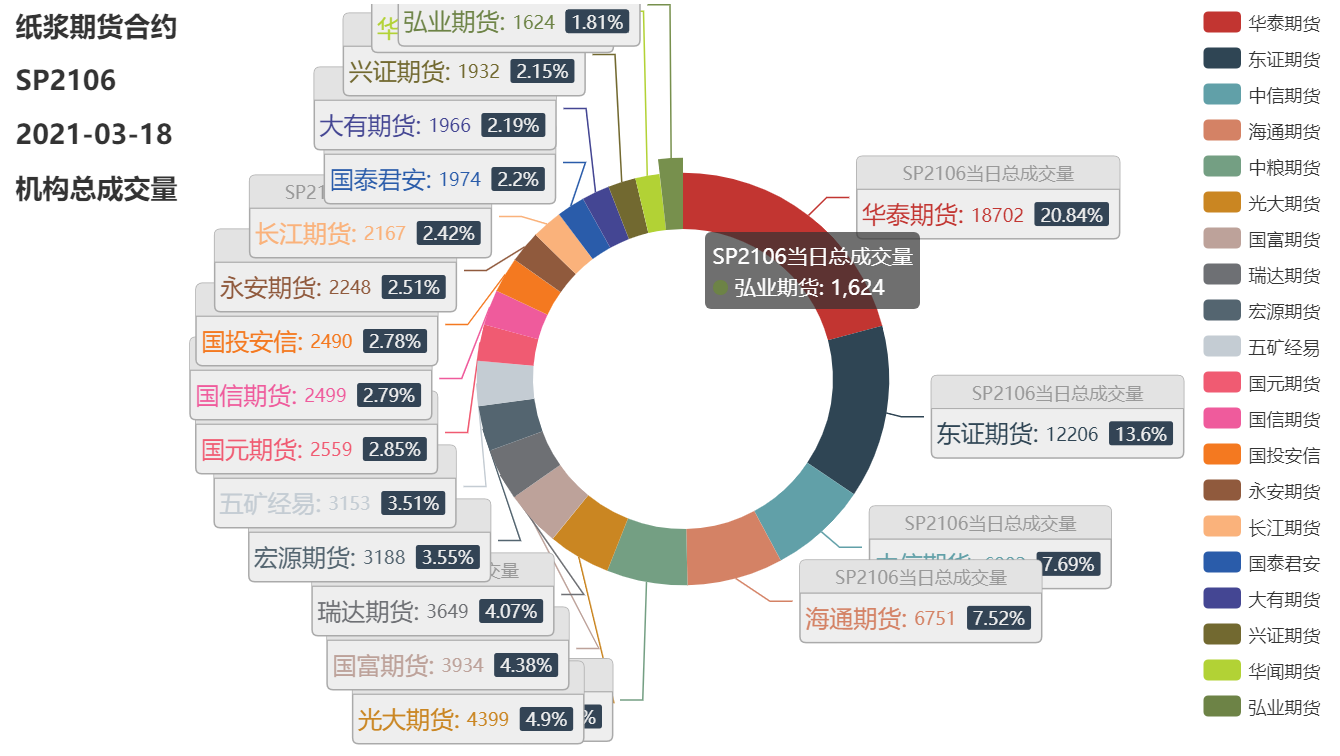

### >>> SP2106 机构当日 “ 多单持仓 ” 增减热力图

In [15]:
from pyecharts.charts import HeatMap

Name = content_3[3]['会员简称'][:20].tolist()
Name_No = content_3[3]['名次'][:20].tolist()
Name_No = list(map(int, Name_No))
Volume = content_3[3]['多单持仓'][:20].tolist()
Delta = content_3[3]['比上交易增减'][:20].tolist()
Delta = list(map(int,Delta))
X_No=list(range(20))
data_T =[list(z) for z in zip(X_No,Name,Delta)]

HeatMap().add_xaxis(xaxis_data=Volume).add_yaxis(
        '横轴为机构 "现有仓位"\n\n色块为单日 "仓位增减"',
        yaxis_data=Name,
        value=data_T,
        label_opts=opts.LabelOpts(is_show=True, position="inside"),
    ).set_global_opts(
        title_opts=opts.TitleOpts(title='SP'+SP_str_3+' , '+Yesterday+", 多单持仓热力图"),
        xaxis_opts=opts.AxisOpts(type_="category",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1))),
        yaxis_opts=opts.AxisOpts(type_="category",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1))),
        visualmap_opts=opts.VisualMapOpts(
            min_=min(Delta), max_=max(Delta), is_calculable=True, orient="horizontal", pos_left="center",\
            range_color=["#1E90FF","#FFFF00","#FF4500"]
        )) # .render_notebook()

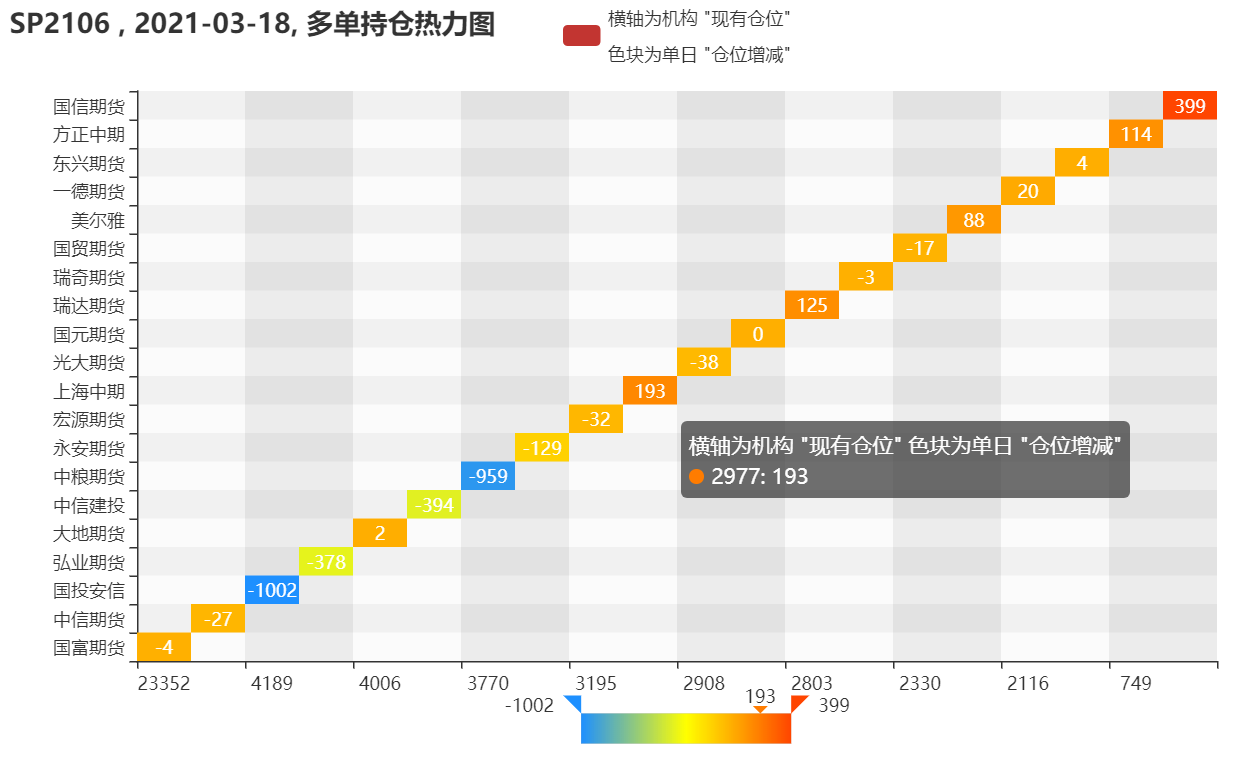

### >>> SP2106 机构当日 “ 空单持仓 ” 增减热力图

In [16]:
from pyecharts.charts import HeatMap

Name = content_3[4]['会员简称'][:20].tolist()
Name_No = content_3[4]['名次'][:20].tolist()
Name_No = list(map(int, Name_No))
Volume = content_3[4]['空单持仓'][:20].tolist()
Delta = content_3[4]['比上交易增减'][:20].tolist()
Delta = list(map(int,Delta))
X_No=list(range(20))
data_T =[list(z) for z in zip(X_No,Name,Delta)]

HeatMap().add_xaxis(xaxis_data=Volume).add_yaxis(
        '横轴为机构 "现有仓位"\n\n色块为单日 "仓位增减"',
        yaxis_data=Name,
        value=data_T,
        label_opts=opts.LabelOpts(is_show=True, position="inside"),
    ).set_global_opts(
        title_opts=opts.TitleOpts(title='SP'+SP_str_3+' , '+Yesterday+", 空单持仓热力图"),
        xaxis_opts=opts.AxisOpts(type_="category",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1))),
        yaxis_opts=opts.AxisOpts(type_="category",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1))),
        visualmap_opts=opts.VisualMapOpts(
            min_=min(Delta), max_=max(Delta), is_calculable=True, orient="horizontal", pos_left="center",\
            range_color=["#1E90FF","#FFFF00","#FF4500"]
        )) # .render_notebook()

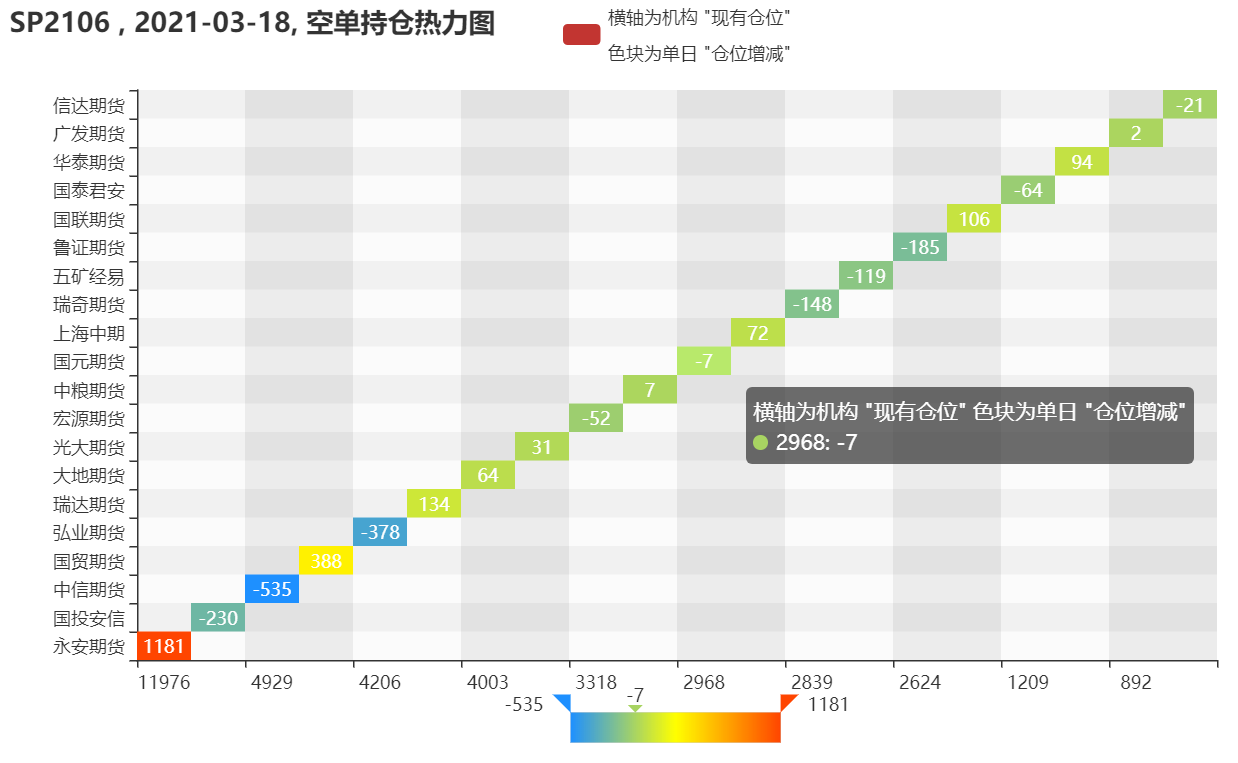